In [1]:
import pandas as pd
import numpy as np

In [2]:
car_data = pd.read_csv(r'C:\Users\user\DSA\Assignments\Assignment 5\car_age_price.csv')
car_data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


# EDA

In [3]:
car_data.info()          # observation : no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [4]:
car_data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [5]:
car_data = car_data.drop_duplicates(keep='first')     # removing duplicates
car_data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
10,2019,500000
11,2018,500000
12,2017,500000


# Outlier Detection

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

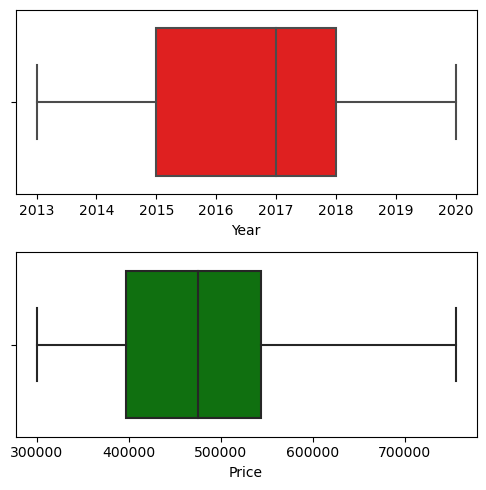

In [7]:
fig,axs=plt.subplots(2,figsize=(5,5))
plt1=sns.boxplot(x=car_data['Year'],ax=axs[0],color='r')
plt2=sns.boxplot(x=car_data['Price'],ax=axs[1],color='g')
plt.tight_layout()

# 1. Linear Regression -  Model Building

In [8]:
X = car_data[['Year']]
y = car_data.Price

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [10]:
X_train.head()

,Year
77,2015
73,2013
50,2013
83,2017
61,2017


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [12]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [13]:
preds = lm.predict(X_test)    # predicting on test data
preds

array([308875.76723662, 401329.20426548, 493782.64129435, 493782.64129435,
       632462.79683764, 632462.79683764, 401329.20426548, 401329.20426548,
       493782.64129435, 540009.35980877, 540009.35980877, 401329.20426548,
       447555.92277992, 493782.64129435, 493782.64129435, 355102.48575105,
       632462.79683764, 447555.92277992])

In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds)
mse

3428857588.3031197

# Finding model coefficients

In [15]:
linear_coefficients = lm.coef_
linear_coefficients

array([46226.71851443])

In [16]:
print(lm.intercept_,lm.coef_)

-92745508.60231656 [46226.71851443]


# Predicting the possible price for 2022 model car

In [17]:
year_to_predict = 2023
predicted_price = lm.predict(np.array([[year_to_predict]]))
print('Predicted price for 2023 model car :'+ str(predicted_price[0]))

Predicted price for 2023 model car :771142.9523809403


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 2. Lasso Regression

In [18]:
from sklearn.linear_model import Lasso

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

lasso_model=Lasso(alpha=0.1)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [19]:
y_pred=lasso_model.predict(X_test)
y_pred

array([541975.73709677, 498094.30532257, 498094.30532257, 410331.44177419,
       366450.00999999, 498094.30532257, 410331.44177419, 322568.57822581,
       410331.44177419, 498094.30532257, 629738.60064515, 410331.44177419])

In [20]:
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_mse

4578559309.462235

In [21]:
# Since the mse is least for Linear regression model, it is the best model. Hence Linear Regression is performing better.